<a href="https://colab.research.google.com/github/JoaoMarcosRamos/analisandodadosairbnb/blob/main/Analisando_os_Dados_do_Airbnb_Dublin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 4.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

Aluno: João Marcos Ramos Monteiro da Silva

Projeto Final do módulo "Análise de Dados e Pandas"

---

# Análise dos Dados do Airbnb - *Dublin*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Dublin, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


In [1]:
# importar os pacotes necessarios

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# importar o arquivo listings.csv para um DataFrame

df = pd.read_csv('https://data.insideairbnb.com/ireland/leinster/dublin/2024-09-11/visualisations/listings.csv')




## Análise dos Dados


**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

In [3]:
# mostrar as 5 primeiras entradas

df.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,44077,cosy comfortable Irish cottage twin,193005,Teresa,NaN,Dn Laoghaire-Rathdown,53.29178,-6.25792,Private room,75.0,3,356,2024-09-08,2.17,2,119,43,NaN
1,85156,Cosy Comfortable Irish Cottage 1 Double Bed,193005,Teresa,NaN,Dn Laoghaire-Rathdown,53.29209,-6.25624,Private room,72.0,3,316,2024-08-27,1.95,2,33,48,NaN
2,159889,Friendly Single Room,766611,Marie,NaN,Dublin City,53.39027,-6.23547,Private room,55.0,2,444,2024-09-01,2.92,3,348,40,NaN
3,162809,5.5 miles south of Dublin City :^),777681,Robbie,NaN,Dn Laoghaire-Rathdown,53.28326,-6.19188,Private room,85.0,2,389,2024-08-25,3.44,2,7,27,NaN
4,165828,Pádraig Pearse apt. Kilmainham,790601,Timothy,NaN,Dublin City,53.33744,-6.32363,Entire home/apt,197.0,3,76,2023-12-28,0.48,4,185,1,NaN


### Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?

A variável "last_review" é a única variável do tipo data e está sendo importada como object. Será corrigida nos próximos passos.

In [45]:
# identificar o volume de dados do DataFrame

print('Registros:',df.shape[0],'\n','Variáveis: ',df.shape[1])

# verificar as 5 primeiras entradas do dataset
df['last_review'] = df.last_review.astype('datetime64[ns]')
df.dtypes


Registros: 6175 
 Variáveis:  18


,0
id,int64
name,object
host_id,int64
host_name,object
neighbourhood_group,float64
neighbourhood,object
latitude,float64
longitude,float64
room_type,object
price,float64


### **Qual a porcentagem de valores ausentes no *dataset*?**

Analisando os valores ausentes em cada coluna, é possível perceber que 100% dos valores de license e neighbourhood estão ausentes. Além disso, 15,6% dos valores em price, uma das variáveis de maior interesse na análise, também estão ausentes.

Outro fator de observação é de que as colunas last_review e reviews_per_month possuem exatamente a mesma quantidade de valores ausentes (14,4%). Com isso, pode-se conduzir novas investigações a partir de hipóteses como:

*   Os 14,4% de valores ausentes são referentes a listings novos, que não possuem nenhuma avaliação?


In [5]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0] * 100).sort_values(ascending=False).round(2)



,0
license,100.00
neighbourhood_group,100.00
price,15.61
last_review,14.40
reviews_per_month,14.40
host_name,0.00
host_id,0.00
neighbourhood,0.00
latitude,0.00
longitude,0.00


### **Q3. Qual o tipo de distribuição das variáveis?**

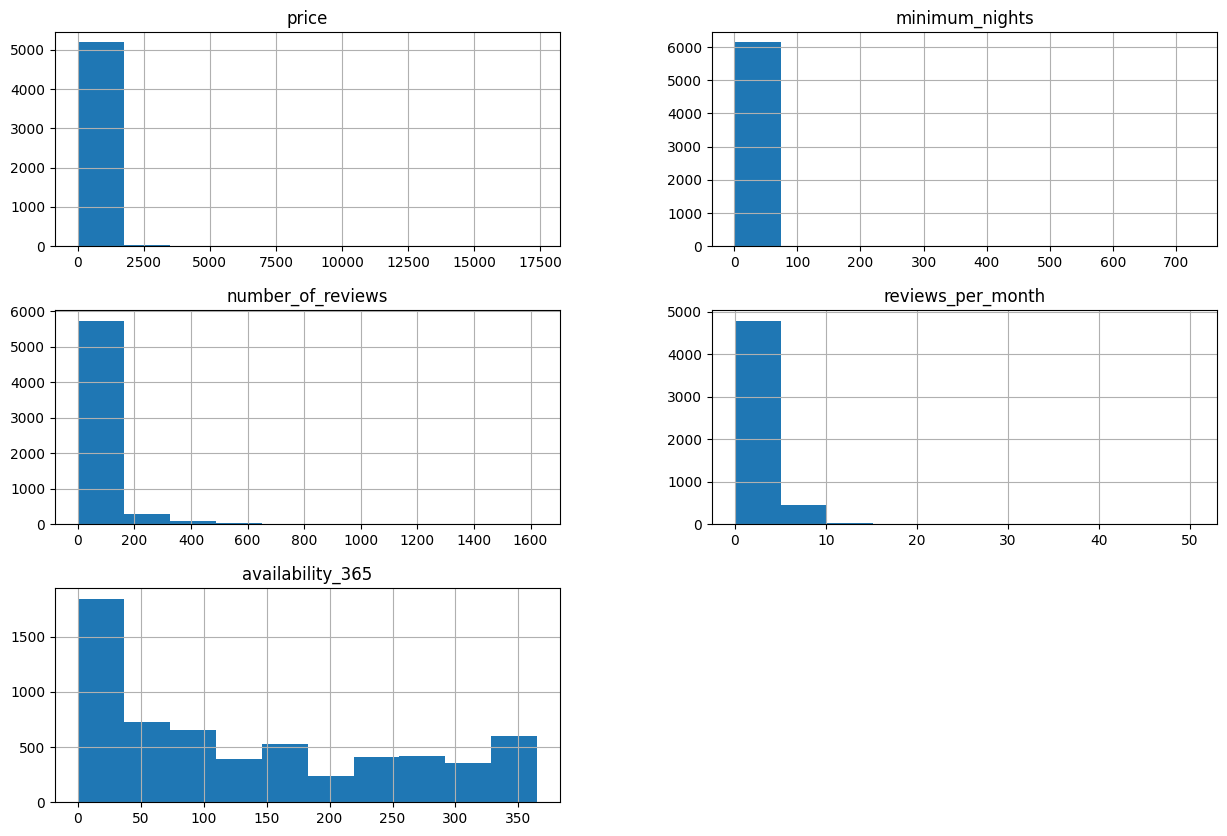

In [6]:
# plotar o histograma das variáveis numéricas

df[['price','minimum_nights','number_of_reviews','reviews_per_month','availability_365']].hist(figsize=(15,10),bins=10)
plt.show()


In [7]:
df[['price','minimum_nights','number_of_reviews','reviews_per_month','availability_365']].describe().round(2)

,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365
count,5211.00,6175.00,6175.00,5286.00,6175.00
mean,203.07,5.45,45.80,2.10,134.55
std,348.32,20.55,91.07,2.67,120.30
min,0.00,1.00,0.00,0.01,0.00
25%,90.00,1.00,2.00,0.54,20.50
50%,142.00,2.00,12.00,1.29,93.00
75%,230.00,4.00,46.00,2.83,245.00
max,17400.00,729.00,1624.00,50.49,365.00


In [58]:
## Quantidade de listings sem avaliações

df_na1 = df[df.reviews_per_month.isna()]
df_na1.number_of_reviews.value_counts()


,count
number_of_reviews,
0,889


### **Q4. Qual a média dos preços de aluguel?**

In [10]:
# ver a média da coluna `price``

print('Média de preço é: ',df.price.mean().round(2),'\n')

# ver as estatísticas descritivas de 'price'
df.price.describe().round(1)


Média de preço é:  203.07 



,price
count,5211.0
mean,203.1
std,348.3
min,0.0
25%,90.0
50%,142.0
75%,230.0
max,17400.0


### **Q4. Qual a correlação existente entre as variáveis**

In [11]:
# criar uma matriz de correlação

corr_mtx = df.loc[:,['price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']].corr()


# mostrar a matriz de correlação
corr_mtx


,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.018140,-0.046512,-0.100040,0.094020,0.027519
minimum_nights,0.018140,1.000000,-0.041053,-0.086961,0.061821,0.062031
number_of_reviews,-0.046512,-0.041053,1.000000,0.401225,-0.061210,0.040445
reviews_per_month,-0.100040,-0.086961,0.401225,1.000000,-0.103372,0.025750
calculated_host_listings_count,0.094020,0.061821,-0.061210,-0.103372,1.000000,0.072716
availability_365,0.027519,0.062031,0.040445,0.025750,0.072716,1.000000


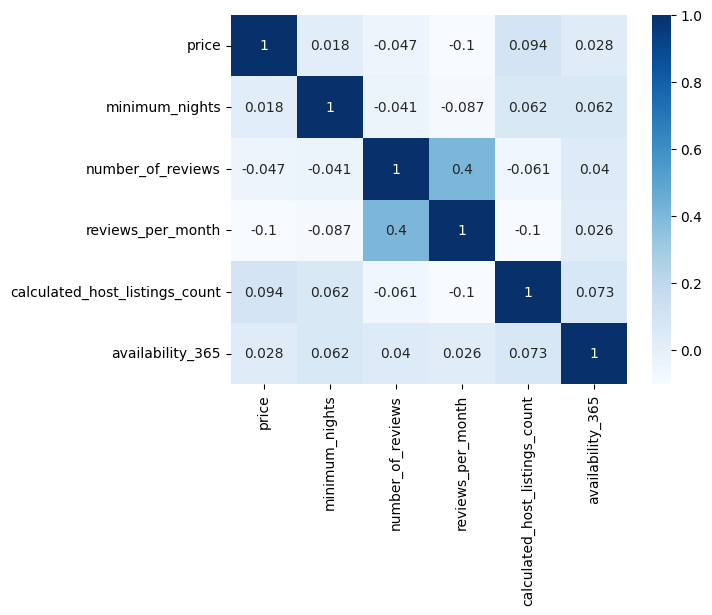

In [12]:
# plotar um heatmap a partir das correlações

sns.heatmap(corr_mtx,annot=True,cmap='Blues')
plt.show()


### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

In [30]:
# mostrar a quantidade de cada tipo de imóvel disponível

df.room_type.value_counts(normalize=True)


,proportion
room_type,
Entire home/apt,0.561943
Private room,0.416032
Shared room,0.020729
Hotel room,0.001296


In [14]:
## Qual a média e a mediana de preço por tipo de quarto?

mean = df.groupby('room_type').price.mean().round(2).reset_index().rename(columns={'price':'mean'}).set_index('room_type')
median = df.groupby('room_type').price.median().round(2).reset_index().rename(columns={'price':'median'}).set_index('room_type')
#merge

pd.concat([mean,median],axis=1)

#


,mean,median
room_type,,
Entire home/apt,280.73,203.0
Hotel room,209.40,178.0
Private room,109.31,90.0
Shared room,44.90,35.0


In [15]:
# mostrar a porcentagem de cada tipo de imóvel disponível

df.room_type.value_counts(normalize=True).round(2)


,proportion
room_type,
Entire home/apt,0.56
Private room,0.42
Shared room,0.02
Hotel room,0.00


### **Q6. Qual a localidade mais cara do dataset?**



In [59]:
p1 = df.neighbourhood.value_counts(normalize=True).round(2)*100

p1




,proportion
neighbourhood,
Dublin City,69.0
Fingal,12.0
Dn Laoghaire-Rathdown,12.0
South Dublin,7.0


In [31]:
# ver preços por bairros, na média

df.groupby('neighbourhood').price.median().sort_values(ascending=False).round(2)



,price
neighbourhood,
Dublin City,152.0
Dn Laoghaire-Rathdown,150.5
Fingal,109.0
South Dublin,90.0


In [33]:
# Análise da mediana de preços relação aos tipos de listings por bairro

pivot_medianaprecos = df.pivot_table(index='neighbourhood',columns='room_type',values='price',aggfunc='median')

pivot_medianaprecos

# proporcao = pivot_table.div(pivot_table.sum(axis=1), axis=0).round(2)

# proporcao

room_type,Entire home/apt,Hotel room,Private room,Shared room
neighbourhood,,,,
Dn Laoghaire-Rathdown,205.0,NaN,85.0,200.0
Dublin City,204.0,178.0,99.0,35.0
Fingal,200.0,NaN,85.0,35.5
South Dublin,192.0,NaN,71.0,NaN


Em geral, o preço de Apartamentos/casas inteiras não sofre alteração significativa em relação ao bairro, exceto em South Dublin, que é um pouco mais barato. A diferença entre o bairro com a maior mediana (Dn Laoghaire) e menor (South Dublin) é de 13 Euros.
Para Quartos privativos, a diferença é mais significativa, de 28 Euros, entre o bairro com a maior mediana, Dublin City (99 Euros), e o menor, South Dublin (71 Euros).

In [17]:
# Demonstrar a estatística descritiva dos preços por bairro.

df.groupby('neighbourhood').price.describe().round(1)


,count,mean,std,min,25%,50%,75%,max
neighbourhood,,,,,,,,
Dn Laoghaire-Rathdown,602.0,199.6,166.5,20.0,88.0,150.5,245.8,1250.0
Dublin City,3541.0,212.0,243.5,0.0,100.0,152.0,245.0,2823.0
Fingal,683.0,203.5,765.1,20.0,75.5,109.0,181.0,17400.0
South Dublin,385.0,125.8,99.0,28.0,63.0,90.0,150.0,700.0


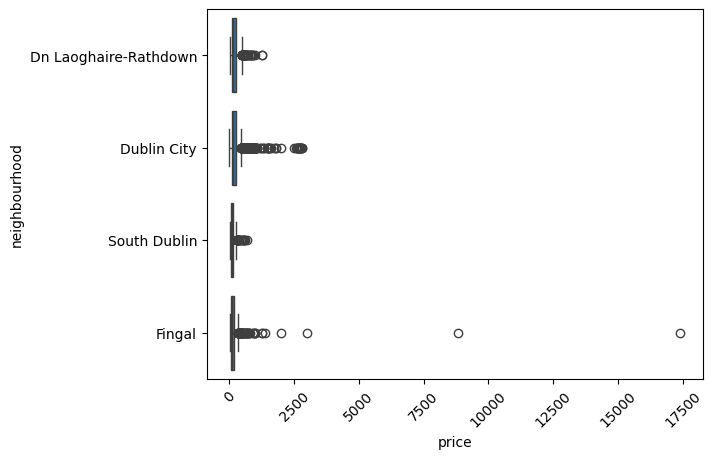

In [18]:
# Demonstrar um boxplot por bairro

sns.boxplot(data=df,y='neighbourhood',x='price')
plt.xticks(rotation=45)
plt.show()



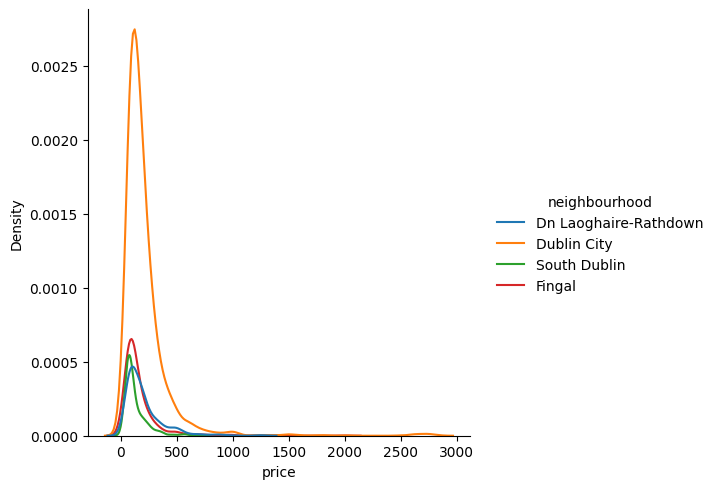

In [19]:
# Visualizando a distribuição de preços por bairro

sns.displot(data = df[df['price']<3000], hue = 'neighbourhood',x='price',kind='kde')

plt.show()


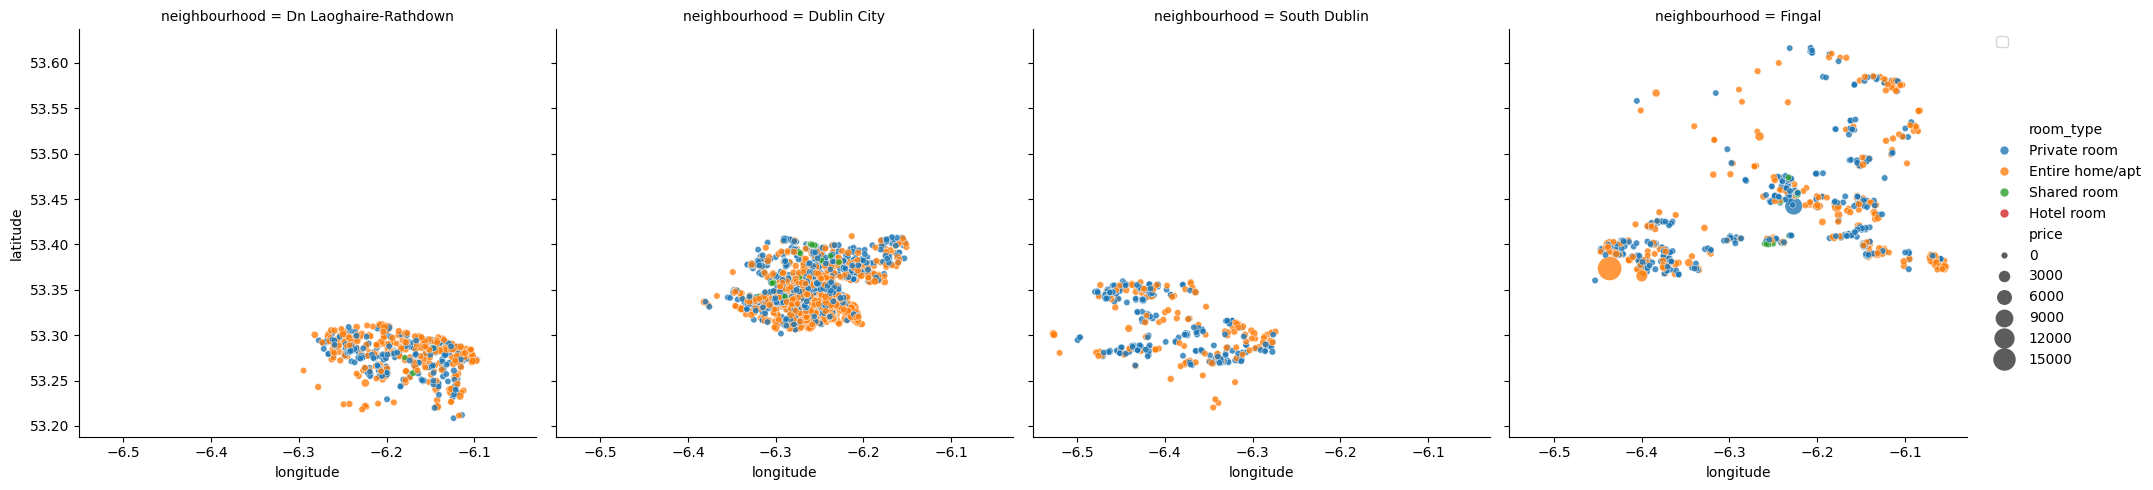

In [20]:
# plotar os imóveis pela latitude-longitude

sns.relplot(data=df,x='longitude',y='latitude',hue='room_type',legend=True, col = 'neighbourhood',alpha = 0.8,size = 'price',sizes=(20,300))
# plt.title('Imóveis por localização')
plt.legend(loc='upper left',bbox_to_anchor=(1.05,1))
plt.show()


Dn Laoghaire and Dublin City possuem mais apartamentos inteiros do que quartos privados. Já South Dublin e Fingal possuem mais quartos privados do que apartamentos inteiros. Novas hipóteses:


*   Os bairros mais próximos ao centro possuem mais apartamentos inteiros.
*   Os únicos quartos de hotel do Airbnb Dublin estão em Dublin City.
*   South Dublin não possui quartos compartilhados.
*   



In [21]:
# Criar uma tabela com  a quantidade de tipos de imóveis por bairro em Dublin

df.pivot_table(index='neighbourhood',columns='room_type',values='id',aggfunc='count')




room_type,Entire home/apt,Hotel room,Private room,Shared room
neighbourhood,,,,
Dn Laoghaire-Rathdown,428.0,NaN,284.0,4.0
Dublin City,2582.0,8.0,1568.0,94.0
Fingal,314.0,NaN,425.0,30.0
South Dublin,146.0,NaN,292.0,NaN


In [23]:
# Proporção de cada linha em relação ao total de cada linha

pivot_table = df.pivot_table(index='neighbourhood',columns='room_type',values='id',aggfunc='count')

proporcao = pivot_table.div(pivot_table.sum(axis=1), axis=0).round(2)

proporcao

room_type,Entire home/apt,Hotel room,Private room,Shared room
neighbourhood,,,,
Dn Laoghaire-Rathdown,0.60,NaN,0.40,0.01
Dublin City,0.61,0.0,0.37,0.02
Fingal,0.41,NaN,0.55,0.04
South Dublin,0.33,NaN,0.67,NaN


In [67]:
# Análise dos outliers por bairro

q25 = df.price.quantile(0.25)
q75 = df.price.quantile(0.75)
iqr = q25 - q75

upper = q75*1.5 + iqr
lower = q25*1.5 - iqr

price_outliers = df[df['price']>=upper]

#price_outliers.sort_values('price',ascending=False).head(10)

price_outliers.neighbourhood.value_counts()

print("O total de outliers é:",price_outliers.id.count(), f"o que corresponde a {(price_outliers.id.count()/df.id.count()).round(3)*100}% do dataset.")


O total de outliers é: 1546 o que corresponde a 25.0% do dataset.


Analisando Hipótese: Os imóveis mais pertos do centro possuem menor disponibilidade?

*   Visualmente não há relação.



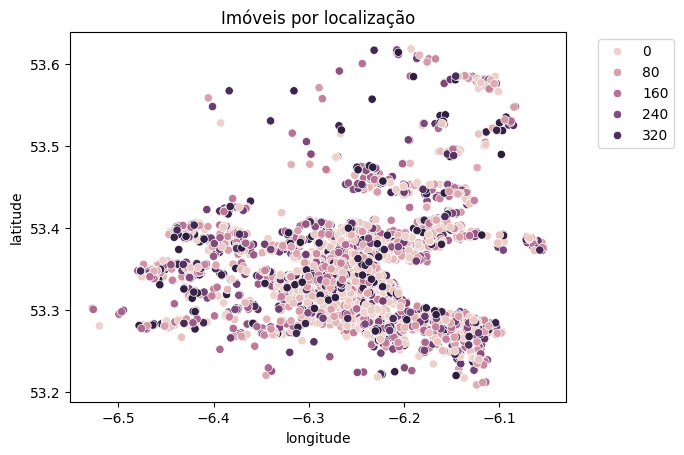

In [25]:
# plotar gráfico
sns.scatterplot(data=df,x='longitude',y='latitude',hue='availability_365',legend=True)
plt.title('Imóveis por localização')
plt.legend(loc='upper left',bbox_to_anchor=(1.05,1))
plt.show()


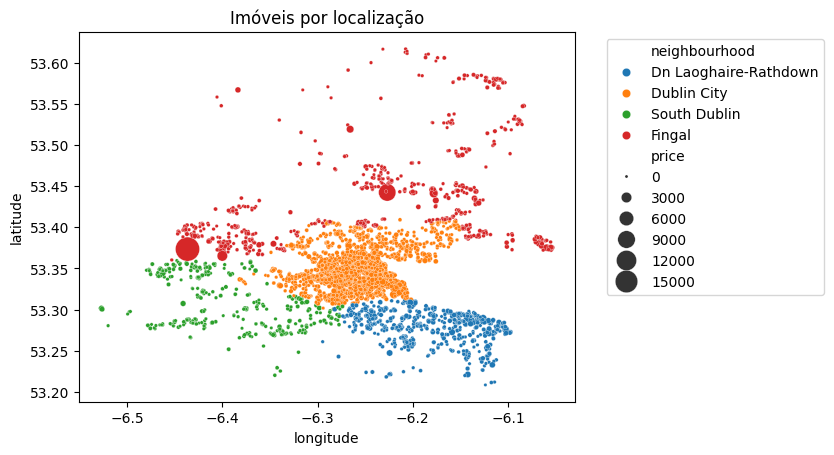

In [26]:
# plotar os imóveis pela latitude-longitude

sns.scatterplot(data=df,x='longitude',y='latitude',hue='neighbourhood',size = 'price',sizes=(5,300),legend=True)
plt.title('Imóveis por localização')
plt.legend(loc='upper left',bbox_to_anchor=(1.05,1))
plt.show()


### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [69]:
# ver a média da coluna `minimum_nights``

df.minimum_nights.median()


2.0

Qual é a média de listings por host?

In [28]:
# ver a média de listings por host
print('A Média de listing por host é: ',
df[['host_id','calculated_host_listings_count']].drop_duplicates().calculated_host_listings_count.mean().round(2)
)



A Média de listing por host é:  1.61


## Conclusões


## Geral
Os dados disponíveis proporcionam uma boa visão inicial do mercado de Airbnb em Dublin. A partir da análise desses dados surgem perguntas interessantes, contudo, os dados limitados não permitem uma investigação mais detalhada. Os principais achados e as perguntas para investigação posterior seguem abaixo.

## Principais Achados

### Correlações
Não foi identificada nenhuma correlação significativa entre as variáveis analisadas.

### Presença de Outliers
Há uma presença relevante de outliers na variável preços no dataset analisado. Foi identificado que muitos desses outliers fazem parte do conjunto de imóveis com zero avaliações. O que pode indicar uma nova linha de investigação.
O total de outliers é: 1546 o que corresponde a 25.0% do dataset

### Tipos de Imóveis

O tipo de imóvel mais alugado em Dublin são casa/apartamentos inteiros e correspondem a 56% do dataset analisado, seguido dos Quartos Privados, que compõe 41,6%.

Devido à considerável presença de outliers nos preços, foi utilizada a mediana para análise dos preços por tipo de quarto


### Bairros
Dublin City concentra 69% do total de listings, Fingal e Dn Laoghaire estão empatados com 12% dos listings cada. Os demais 7% estão em South Dublin.
Os bairros mais próximos ao centro possuem mais apartamentos inteiros.
Os únicos quartos de hotel do Airbnb Dublin estão em Dublin City.
South Dublin não possui quartos compartilhados.

### Noites Mínimas
A mediana do mínimo de noites é de 2 noites.

### Hosts

A média de *listings* por *host* é de 1,61.

### Análise de Preços

Dublin City é o bairro com a maior mediana de preços, principalmente por concentrar a maior parte dos Apartamentos/Casas inteiras.

Em geral, o preço de Apartamentos/casas inteiras não sofre alteração significativa em relação ao bairro, exceto em South Dublin, onde a mediana é desse tipo de locação é um pouco menor. A diferença entre o bairro com a maior mediana (Dn Laoghaire) e menor (South Dublin) é de 13 Euros.
Para Quartos privativos, a diferença é mais significativa, de 28 Euros, entre o bairro com a maior mediana, Dublin City (99 Euros), e o menor, South Dublin (71 Euros).


